In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### 일별 시각화

In [2]:
day=pd.read_csv('서울시 기간별 일평균 대기환경 정보_최종.csv',encoding='cp949')

In [3]:
day=day.rename(columns={'미세먼지(㎍/㎥)':'dust','이산화질소농도(ppm)':'no2','초미세먼지(㎍/㎥)':'fdust','아황산가스농도(ppm)':'so2','오존(ppm)':'o3','이산화질소농도(ppm)':'no2','일산화탄소농도(ppm)':'co'})

In [4]:
day_231=day.loc[day['측정소명']=='영등포구',['측정일자','dust','fdust','no2','o3']]

In [5]:
day_231=day.loc[(day['측정일자'] >=20220301) & (day['측정일자']<=20220430),['측정일자','dust','fdust','no2','o3']]

In [6]:
day_231_df=day_231.astype({ '측정일자' : 'string' })

In [7]:
day_231_df['측정일자2']=pd.to_datetime(day_231_df['측정일자'], format='%Y-%m-%d') 

In [8]:
day_231_df['weekday']=day_231_df['측정일자2'].dt.weekday

In [9]:
weekday_list=['mon','tue','wed','thu','fri','sat','sun']
day_231_df['week']=day_231_df.apply(lambda x : weekday_list[x['weekday']],axis=1)

In [10]:
col=['#6B4E24','#EECA98','#EBAA4F','#6B5B45','#B8853E','#AB891A','#6B5610','#EBBC23','#F7B50F']

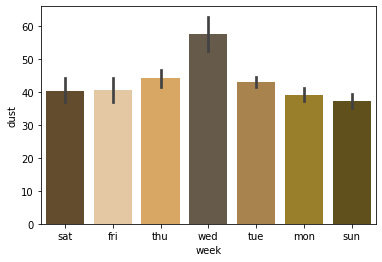

In [11]:
#미세먼지
sns.barplot(data = day_231_df,x= 'week', y = 'dust',palette = col)
plt.show()

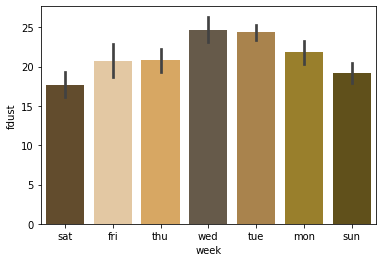

In [12]:
#초미세먼지
sns.barplot(data = day_231_df,x= 'week', y = 'fdust',palette = col)
plt.show()

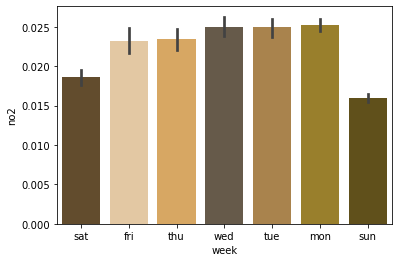

In [13]:
#이산화질소
sns.barplot(data = day_231_df,x= 'week', y = 'no2',palette = col)
plt.show()

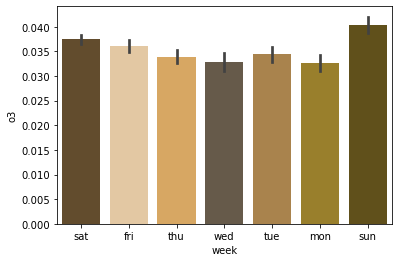

In [14]:
#오존
sns.barplot(data = day_231_df,x= 'week', y = 'o3',palette = col)
plt.show()

### 연도별 시각화

In [15]:
year=pd.read_csv('서울시 년도별 평균 대기오염도 정보_최종.csv',encoding='cp949')

In [16]:
year=year.rename(columns={'측정년도':'year','미세먼지(㎍/㎥)':'dust','이산화질소농도(ppm)':'no2','초미세먼지(㎍/㎥)':'fdust','아황산가스(ppm)':'so2','오존농도(ppm)':'o3','이산화질소농도(ppm)':'no2','일산화탄소농도(ppm)':'co'})

In [22]:
year_df1=year[['no2','o3','year']]
year_df1=year_df1.fillna(year_df1.mean())

year_df2=year[['dust','fdust','year']]
year_df2=year_df2.loc[year_df2['year']>=2013]

year_df01=year_df1.groupby(by='year').mean()
year_df02=year_df2.groupby(by='year').mean()

year_df2=year[['dust','fdust','year']]

year_231=year.loc[year['측정소명']=='영등포구']
year_231=year_231[['year','no2','o3','dust','fdust']]

In [23]:
year_231_df=year_231.set_index('year',drop=False)

In [28]:
year_231_df1=year_231_df[['no2','o3','year']]
year_231_df1=year_231_df1.fillna(year_df1.mean())

year_231_df2=year_231_df[['dust','fdust','year']]
year_231_df2=year_231_df2.loc[year_231_df2['year']>=2013]

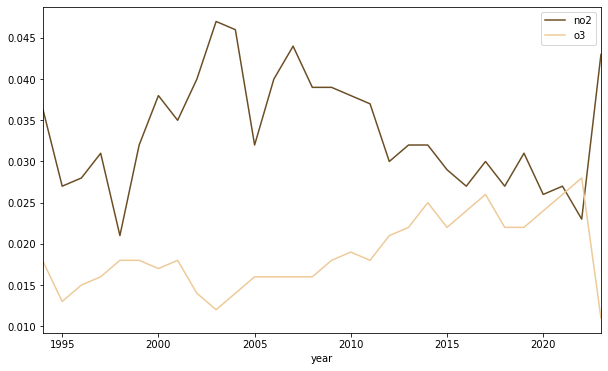

In [29]:
year_231_df1[['no2','o3']].plot(figsize=(10,6),color=col).autoscale(axis='x',tight=True)

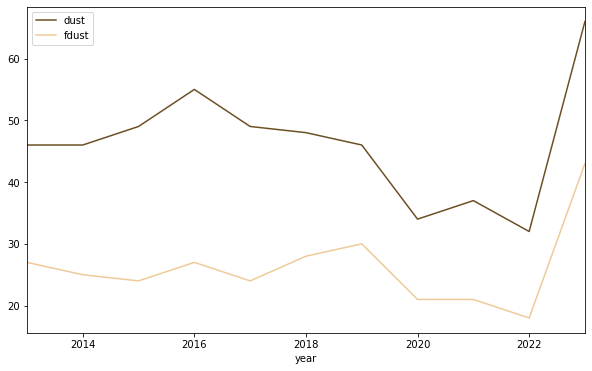

In [30]:
year_231_df2[['dust','fdust']].plot(figsize=(10,6),color=col).autoscale(axis='x',tight=True)

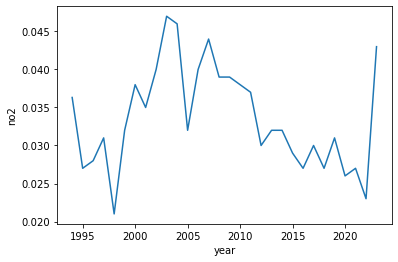

In [31]:
sns.lineplot(data = year_231_df1, x = year_231_df1.index, y = 'no2')
plt.show()

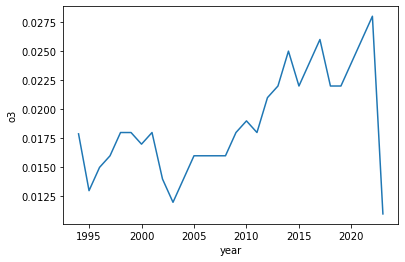

In [32]:
sns.lineplot(data = year_231_df1, x = year_231_df1.index, y = 'o3')
plt.show()

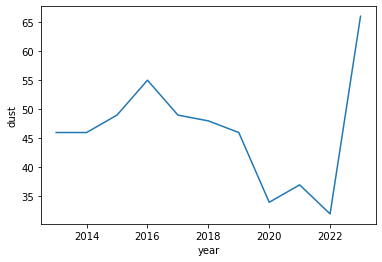

In [33]:
sns.lineplot(data = year_231_df2, x = year_231_df2.index, y = 'dust')
plt.show()

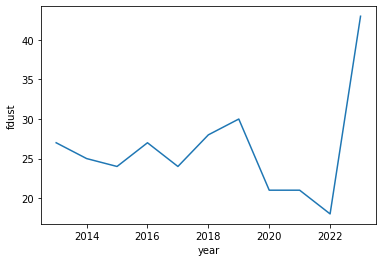

In [34]:
sns.lineplot(data = year_231_df2, x = year_231_df2.index, y = 'fdust')
plt.show()